In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.extensions import Initialize
from qiskit.providers.aer.noise import NoiseModel
import qiskit.quantum_info as qi

# Loading your IBM Quantum account(s)
IBMQ.save_account('3066a0e464d5ddedf6d32204505804954ee3d7449a8319efb380c197d911544bc4ed0dd04900541864385ad01cc685ccf0b1cfc0ec80d23d06461349c75ad636')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2022-04-27 13:24:56,932: Credentials already present. Set overwrite=True to overwrite.


## Multi-Qubit Gates: Teleportation Protocol

In these exercises we will build a so called '<i> Bell Measurement </i>'. This means that we project a state onto the four Bell states:

$$
|\psi^{00}\rangle=\frac{1}{2}(|00\rangle + |11\rangle)
$$

$$
|\psi^{01}\rangle=\frac{1}{2}(|00\rangle - |11\rangle)
$$

$$
|\psi^{10}\rangle=\frac{1}{2}(|10\rangle + |01\rangle)
$$

$$
|\psi^{11}\rangle=\frac{1}{2}(|10\rangle - |01\rangle)
$$

We start with the situation where we consdir the usual suspects Alice and Bob. Bob wants to send his quantum state $\phi$ to Alice. The problem however is that Alice and Bob only share a classical channel (e.g. a phone) and a Bell state. (take $|\psi^{00}\rangle=\frac{1}{2}\big(|00\rangle + |11\rangle\big)$  )

In the coming exercise we will consider how Bob can send his state to alice with the use of multi-qubit gates.

For the coming exercise we consider $q_0$ to be Alice's qubit, which is entangled with  $q_1$  on Bob's side. The state we want to teleport is encoded on $q_2$ . 

In [2]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different register
teleportation_circuit = QuantumCircuit(qr, crz, crx)

<b>1.) Produce the Bell state: $|\psi^{00}\rangle$ between qubit $q_0$ and $q_1$.

In [3]:
def psi_00(circuit, q1, q2):
    circuit.h(q1)
    circuit.cx(q1, q2)  

<b>2.) Read out $q_1$ and $q_2$ in the Bell basis.</b> (This means that we want to obtain $xz$ from $|\psi^{xz}\rangle$ ). Store the outcomes in the classical registers $z \rightarrow$ `crz` and $x \rightarrow$`crx`.

In [4]:
def Bell_measurement(circuit, q1, q2, crx, crz):
    circuit.cx(q2, q1)
    circuit.h(q2)
    circuit.barrier()
    circuit.measure(q1,crx)
    circuit.measure(q2,crz)

<b> 3.) Now Bob sends his found $xz$ to Alice. She, on her turn applies to following conditional gates on here qubit $q_0$: $X^xZ^z$ </b> hint: Make use of the `c_if` gate
    

In [5]:
def conditional_gates(circuit, q0, crx, crz):
    circuit.x(q0).c_if(crx, 1)
    circuit.z(q0).c_if(crz, 1)

Now we bring the circuit together:

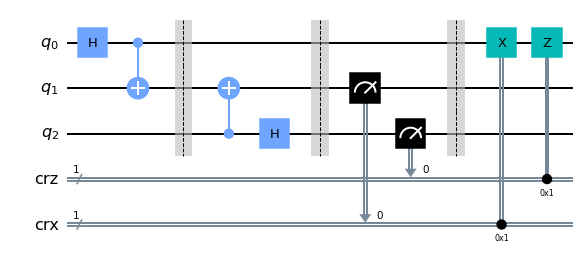

In [6]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx") #Classical Registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


#STEP 1:  Create the Bell state between q0 and q1
psi_00(teleportation_circuit, 0, 1 )

#STEP 2: Bell Measurement
teleportation_circuit.barrier()
Bell_measurement(teleportation_circuit, 1, 2, crx, crz)

#STEP 3: Conditional Gates
teleportation_circuit.barrier()
conditional_gates(teleportation_circuit,0, crx, crz)
teleportation_circuit.draw('mpl')
